In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import io

In [ ]:
# selecting a database to load
print("Select database to load...")
from google.colab import files

# the uploaded object is a dictionary having the filename and the content of the file
uploaded =  files.upload()

Select database to load...


Saving Family-Income-and-Expenditure-v1.3.csv to Family-Income-and-Expenditure-v1.3.csv


In [ ]:
# reading the file directly from the uploaded dictionary using the io library and storing it in the variable `dataset_raw`  
dataset_raw = pd.read_csv(io.BytesIO(uploaded['Family-Income-and-Expenditure-v1.3.csv']))
print("Done with loading data to dataframes...")

# getting and showing the first n rows of the dataset
dataset_raw.head()

Done with loading data to dataframes...


,Record ID,Social Classes,Total Household Income (PHP),Total Household Income Group,Region,Total Food Expenditure (PHP),Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure (PHP),Total Rice Expenditure (PHP),Meat Expenditure (PHP),Total Fish and marine products Expenditure (PHP),Fruit Expenditure (PHP),Vegetables Expenditure (PHP),Restaurant and hotels Expenditure (PHP),Alcoholic Beverages Expenditure (PHP),Tobacco Expenditure (PHP),"Clothing, Footwear and Other Wear Expenditure (PHP)",Housing and water Expenditure (PHP),Imputed House Rental Value (PHP),Medical Care Expenditure (PHP),Transportation Expenditure (PHP),Communication Expenditure (PHP),Education Expenditure (PHP),Miscellaneous Goods and Services Expenditure (PHP),Special Occasions Expenditure (PHP),Crop Farming and Gardening expenses (PHP),Total Income from Entrepreneurial Acitivites (PHP),Household Head Sex,Household Head Age,Household Head Age Group,Household Head Marital Status,Household Head Highest Grade Completed,Household Head College Program,Household Head Job or Business Indicator,Household Head Occupation (Major Group),Household Head Occupation (Major Sub-Group),Household Head Occupation (Minor Group),Household Head Class of Worker,Type of Household,Total Number of Family members,Family Size,Family Size II,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,100001,Lower middle,480332,"250,000 - 499,999",CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,41-50 yrs old,Single,College Graduate,Teacher Training and Education Sciences Programs,With Job/Business,Professionals,Teaching Professionals,Primary School Teachers,Government Employee,Extended Family,4,Four persons,5 persons or less,0,1,1,Single house,Strong materials,Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1
1,100002,Low-income,198235,"100,000 - 249,999",CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,31-40 yrs old,Married,College Graduate,Transport Services Programs,With Job/Business,Service and Sales Workers,Personal Service Workers,Transport Conductors,Private Employee,Single Family,3,Three persons,5 persons or less,0,1,2,Single house,Strong materials,Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2
2,100003,Poor,82785,"60,000 - 99,999",CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,31-40 yrs old,Married,Elementary Undergraduate,None,With Job/Business,Elementary Occupations,"Agricultural, Forestry and Fishery Laborers",Crop Farm Laborers,Private Employee,Single Family,6,Six persons,6 persons or more,0,4,3,Single house,Light materials,Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0
3,100004,Poor,107589,"100,000 - 249,999",CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,1558

In [ ]:
# displaying the types of attributes
dataset_raw.dtypes

Record ID                               int64
Social Classes                         object
Total Household Income (PHP)            int64
Total Household Income Group           object
Region                                 object
                                        ...  
Number of Cellular phone                int64
Number of Personal Computer             int64
Number of Stove with Oven/Gas Range     int64
Number of Motorized Banca               int64
Number of Motorcycle/Tricycle           int64
Length: 69, dtype: object

In [ ]:
# displaying the number of rows and columns
dataset_raw.shape

(41447, 69)

In [ ]:
# displaying the columns of the dataset
dataset_raw.columns

Index(['Record ID', 'Social Classes', 'Total Household Income (PHP)',
       'Total Household Income Group', 'Region',
       'Total Food Expenditure  (PHP)', 'Main Source of Income',
       'Agricultural Household indicator ',
       'Bread and Cereals Expenditure  (PHP)', 'Total Rice Expenditure  (PHP)',
       'Meat Expenditure  (PHP)',
       'Total Fish and  marine products Expenditure  (PHP)',
       'Fruit Expenditure  (PHP)', 'Vegetables Expenditure  (PHP)',
       'Restaurant and hotels Expenditure  (PHP)',
       'Alcoholic Beverages Expenditure  (PHP)', 'Tobacco Expenditure  (PHP)',
       'Clothing, Footwear and Other Wear Expenditure  (PHP)',
       'Housing and water Expenditure  (PHP)',
       'Imputed House Rental Value  (PHP)', 'Medical Care Expenditure  (PHP)',
       'Transportation Expenditure  (PHP)', 'Communication Expenditure  (PHP)',
       'Education Expenditure  (PHP)',
       'Miscellaneous Goods and Services Expenditure  (PHP)',
       'Special Occasions Exp

In [ ]:
# isnull() function to identify the missing values in the data frame; sum() functions to get sum of all missing values per column
dataset_raw.isnull().sum()

Record ID                              0
Social Classes                         0
Total Household Income (PHP)           0
Total Household Income Group           0
Region                                 0
                                      ..
Number of Cellular phone               0
Number of Personal Computer            0
Number of Stove with Oven/Gas Range    0
Number of Motorized Banca              0
Number of Motorcycle/Tricycle          0
Length: 69, dtype: int64

In [ ]:
df = dataset_raw
df.head(5)

,Record ID,Social Classes,Total Household Income (PHP),Total Household Income Group,Region,Total Food Expenditure (PHP),Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure (PHP),Total Rice Expenditure (PHP),Meat Expenditure (PHP),Total Fish and marine products Expenditure (PHP),Fruit Expenditure (PHP),Vegetables Expenditure (PHP),Restaurant and hotels Expenditure (PHP),Alcoholic Beverages Expenditure (PHP),Tobacco Expenditure (PHP),"Clothing, Footwear and Other Wear Expenditure (PHP)",Housing and water Expenditure (PHP),Imputed House Rental Value (PHP),Medical Care Expenditure (PHP),Transportation Expenditure (PHP),Communication Expenditure (PHP),Education Expenditure (PHP),Miscellaneous Goods and Services Expenditure (PHP),Special Occasions Expenditure (PHP),Crop Farming and Gardening expenses (PHP),Total Income from Entrepreneurial Acitivites (PHP),Household Head Sex,Household Head Age,Household Head Age Group,Household Head Marital Status,Household Head Highest Grade Completed,Household Head College Program,Household Head Job or Business Indicator,Household Head Occupation (Major Group),Household Head Occupation (Major Sub-Group),Household Head Occupation (Minor Group),Household Head Class of Worker,Type of Household,Total Number of Family members,Family Size,Family Size II,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,100001,Lower middle,480332,"250,000 - 499,999",CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,41-50 yrs old,Single,College Graduate,Teacher Training and Education Sciences Programs,With Job/Business,Professionals,Teaching Professionals,Primary School Teachers,Government Employee,Extended Family,4,Four persons,5 persons or less,0,1,1,Single house,Strong materials,Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1
1,100002,Low-income,198235,"100,000 - 249,999",CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,31-40 yrs old,Married,College Graduate,Transport Services Programs,With Job/Business,Service and Sales Workers,Personal Service Workers,Transport Conductors,Private Employee,Single Family,3,Three persons,5 persons or less,0,1,2,Single house,Strong materials,Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2
2,100003,Poor,82785,"60,000 - 99,999",CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,31-40 yrs old,Married,Elementary Undergraduate,None,With Job/Business,Elementary Occupations,"Agricultural, Forestry and Fishery Laborers",Crop Farm Laborers,Private Employee,Single Family,6,Six persons,6 persons or more,0,4,3,Single house,Light materials,Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0
3,100004,Poor,107589,"100,000 - 249,999",CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,1558

In [ ]:
df.pop('Record ID')
df.pop('Total Household Income (PHP)')
df.pop('Total Household Income Group')
df.pop('Household Head Occupation (Major Sub-Group)')
df.pop('Household Head Occupation (Minor Group)')
df.pop('Family Size')
df.pop('Family Size II')

0        5 persons or less
1        5 persons or less
2        6 persons or more
3        5 persons or less
4        5 persons or less
               ...        
41442    6 persons or more
41443    6 persons or more
41444    5 persons or less
41445    6 persons or more
41446    6 persons or more
Name: Family Size II, Length: 41447, dtype: object

In [ ]:
df.shape

(41447, 62)

In [ ]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('/', '_')
df.columns = df.columns.str.replace('-', '_')

df = df.rename({'Household_Head_Occupation_(Major_Group)': 'Household_Head_Occupation_Major_Group'}, axis=1)

df.sample(5)

,Social_Classes,Region,Total_Food_Expenditure__(PHP),Main_Source_of_Income,Agricultural_Household_indicator_,Bread_and_Cereals_Expenditure__(PHP),Total_Rice_Expenditure__(PHP),Meat_Expenditure__(PHP),Total_Fish_and__marine_products_Expenditure__(PHP),Fruit_Expenditure__(PHP),Vegetables_Expenditure__(PHP),Restaurant_and_hotels_Expenditure__(PHP),Alcoholic_Beverages_Expenditure__(PHP),Tobacco_Expenditure__(PHP),"Clothing,_Footwear_and_Other_Wear_Expenditure__(PHP)",Housing_and_water_Expenditure__(PHP),Imputed_House_Rental_Value__(PHP),Medical_Care_Expenditure__(PHP),Transportation_Expenditure__(PHP),Communication_Expenditure__(PHP),Education_Expenditure__(PHP),Miscellaneous_Goods_and_Services_Expenditure__(PHP),Special_Occasions_Expenditure__(PHP),Crop_Farming_and_Gardening_expenses__(PHP),Total_Income_from_Entrepreneurial_Acitivites__(PHP),Household_Head_Sex,Household_Head_Age,Household_Head_Age_Group,Household_Head_Marital_Status,Household_Head_Highest_Grade_Completed,Household_Head_College_Program,Household_Head_Job_or_Business_Indicator,Household_Head_Occupation_Major_Group,Household_Head_Class_of_Worker,Type_of_Household,Total_Number_of_Family_members,Members_with_age_less_than_5_year_old,Members_with_age_5___17_years_old,Total_number_of_family_members_employed,Type_of_Building_House,Type_of_Roof,Type_of_Walls,House_Floor_Area,House_Age,Number_of_bedrooms,Tenure_Status,Toilet_Facilities,Electricity,Main_Source_of_Water_Supply,Number_of_Television,Number_of_CD_VCD_DVD,Number_of_Component_Stereo_set,Number_of_Refrigerator_Freezer,Number_of_Washing_Machine,Number_of_Airconditioner,"Number_of_Car,_Jeep,_Van",Number_of_Landline_wireless_telephones,Number_of_Cellular_phone,Number_of_Personal_Computer,Number_of_Stove_with_Oven_Gas_Range,Number_of_Motorized_Banca,Number_of_Motorcycle_Tricycle
37439,Poor,NCR,41373,Wage/Salaries,2,13140,8528,6010,3723,365,1543,9759,0,4525,505,25740,15000,1741,8424,336,0,3396,0,0,0,Male,32,31-40 yrs old,Married,High School Undergraduate,None,With Job/Business,Service and Sales Workers,Private Employee,Single Family,3,1,0,1,Single house,Strong materials,Strong,20,30,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,0,1,0,0,0,1,0,0,0,0
23122,Low-income,VI - Western Visayas,133496,Enterpreneurial Activities,0,25631,19880,10090,22980,2892,6780,5520,0,0,3805,39420,15000,6898,4104,2676,0,6456,17010,0,106910,Male,74,Above 60 yrs old,Married,High School Undergraduate,None,No Job/Business,Unemployed,Unemployed,Single Family,3,1,0,0,Single house,Strong materials,Strong,100,43,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,1,1,0,0,0,1,0,1,0,1
2594,Low-income,IVA - CALABARZON,147896,Wage/Salaries,0,35953,24900,32040,11216,810,3505,59583,1040,1629,4630,13170,6000,18,13098,2100,3000,19878,5150,0,10396,Male,56,51-60 yrs old,Married,Elementary Graduate,None,With Job/Business,Elementary Occupations,Private Employee,Single Family,10,0,6,2,Single house,Strong materials,Strong,10,19,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Shared, tubed/piped deep well",1,1,0,0,0,0,0,0,1,0,0,0,0
74,Poor,CAR,91575,Other sources of Income,1,38181,30368,9279,10968,1440,7387,9888,510,7375,2860,14700,7200,120,7200,960,700,9306,2300,28970,28970,Male,34,31-40 yrs old,Married,High School Graduate,None,With Job/Business,"Skilled Agricultural, Forestry and Fishery Wor...",Family-Operated Business/Farm Employer,Extended Family,7,1,3,3,Single house,Strong materials,Strong,30,17,2,Rent-free house and lot with consent of owner,"Water-sealed, sewer septic tank, used exclusiv...",1,"Shared, tubed/piped deep well",1,0,0,0,0,0,0,0,1,0,0,0,0
25413,Lower middle,III - Central Luzon,68418,Wage/Salaries,0,21861,18957,12525,4586,1577,5686,10920,0,0,2330,40314,24000,7089,16548,2352,0,13362,2000,0,33278

In [ ]:
df.columns

Index(['Social_Classes', 'Region', 'Total_Food_Expenditure__(PHP)',
       'Main_Source_of_Income', 'Agricultural_Household_indicator_',
       'Bread_and_Cereals_Expenditure__(PHP)', 'Total_Rice_Expenditure__(PHP)',
       'Meat_Expenditure__(PHP)',
       'Total_Fish_and__marine_products_Expenditure__(PHP)',
       'Fruit_Expenditure__(PHP)', 'Vegetables_Expenditure__(PHP)',
       'Restaurant_and_hotels_Expenditure__(PHP)',
       'Alcoholic_Beverages_Expenditure__(PHP)', 'Tobacco_Expenditure__(PHP)',
       'Clothing,_Footwear_and_Other_Wear_Expenditure__(PHP)',
       'Housing_and_water_Expenditure__(PHP)',
       'Imputed_House_Rental_Value__(PHP)', 'Medical_Care_Expenditure__(PHP)',
       'Transportation_Expenditure__(PHP)', 'Communication_Expenditure__(PHP)',
       'Education_Expenditure__(PHP)',
       'Miscellaneous_Goods_and_Services_Expenditure__(PHP)',
       'Special_Occasions_Expenditure__(PHP)',
       'Crop_Farming_and_Gardening_expenses__(PHP)',
       'Total_Income

In [ ]:
df[['Region','Household_Head_Marital_Status']].astype(str)

,Region,Household_Head_Marital_Status
0,CAR,Single
1,CAR,Married
2,CAR,Married
3,CAR,Married
4,CAR,Married
...,...,...
41442,XII - SOCCSKSARGEN,Married
41443,XII - SOCCSKSARGEN,Married
41444,XII - SOCCSKSARGEN,Married
41445,XII - SOCCSKSARGEN,Widowed


In [ ]:
# label encoder to convert categorical values
l1 = LabelEncoder()
l2 = LabelEncoder()
l3 = LabelEncoder()
l4 = LabelEncoder()
l5 = LabelEncoder()
l6 = LabelEncoder()
l7 = LabelEncoder()
l8 = LabelEncoder()
l9 = LabelEncoder()
l10 = LabelEncoder()
l11 = LabelEncoder()
l12 = LabelEncoder()
l13 = LabelEncoder()
l14 = LabelEncoder()
l15 = LabelEncoder()
l16 = LabelEncoder()
l17 = LabelEncoder()
l18 = LabelEncoder()
l19 = LabelEncoder()

l1.fit(df['Social_Classes'])
# l2.fit(df['Total_Household_Income_Group'])
l3.fit(df['Region'])
l4.fit(df['Main_Source_of_Income'])
l5.fit(df['Household_Head_Sex'])
l6.fit(df['Household_Head_Age_Group'])
l7.fit(df['Household_Head_Marital_Status'])
l8.fit(df['Household_Head_Highest_Grade_Completed'])
l9.fit(df['Household_Head_Job_or_Business_Indicator'])
l10.fit(df['Household_Head_Occupation_Major_Group'])
l11.fit(df['Household_Head_Class_of_Worker'])
l12.fit(df['Type_of_Household'])
l13.fit(df['Type_of_Building_House'])
l14.fit(df['Type_of_Roof'])
l15.fit(df['Type_of_Walls'])
l16.fit(df['Tenure_Status'])
l17.fit(df['Toilet_Facilities'])
l18.fit(df['Main_Source_of_Water_Supply'])
l19.fit(df['Household_Head_College_Program'])

df.Social_Classes = l1.transform(df.Social_Classes)
# df.Total_Household_Income_Group = l2.transform(df.Total_Household_Income_Group)
df.Region = l3.transform(df.Region)
df.Main_Source_of_Income = l4.transform(df.Main_Source_of_Income)
df.Household_Head_Sex = l5.transform(df.Household_Head_Sex)
df.Household_Head_Age_Group = l6.transform(df.Household_Head_Age_Group)
df.Household_Head_Marital_Status = l7.transform(df.Household_Head_Marital_Status)
df.Household_Head_Highest_Grade_Completed = l8.transform(df.Household_Head_Highest_Grade_Completed)
df.Household_Head_Job_or_Business_Indicator = l9.transform(df.Household_Head_Job_or_Business_Indicator)
df.Household_Head_Occupation_Major_Group = l10.transform(df.Household_Head_Occupation_Major_Group)
df.Household_Head_Class_of_Worker = l11.transform(df.Household_Head_Class_of_Worker)
df.Type_of_Household = l12.transform(df.Type_of_Household)
df.Type_of_Building_House = l13.transform(df.Type_of_Building_House)
df.Type_of_Roof = l14.transform(df.Type_of_Roof)
df.Type_of_Walls = l15.transform(df.Type_of_Walls)
df.Tenure_Status = l16.transform(df.Tenure_Status)
df.Toilet_Facilities = l17.transform(df.Toilet_Facilities)
df.Main_Source_of_Water_Supply = l18.transform(df.Main_Source_of_Water_Supply)
df.Household_Head_College_Program = l19.transform(df.Household_Head_College_Program)	

df.sample(5)

,Social_Classes,Region,Total_Food_Expenditure__(PHP),Main_Source_of_Income,Agricultural_Household_indicator_,Bread_and_Cereals_Expenditure__(PHP),Total_Rice_Expenditure__(PHP),Meat_Expenditure__(PHP),Total_Fish_and__marine_products_Expenditure__(PHP),Fruit_Expenditure__(PHP),Vegetables_Expenditure__(PHP),Restaurant_and_hotels_Expenditure__(PHP),Alcoholic_Beverages_Expenditure__(PHP),Tobacco_Expenditure__(PHP),"Clothing,_Footwear_and_Other_Wear_Expenditure__(PHP)",Housing_and_water_Expenditure__(PHP),Imputed_House_Rental_Value__(PHP),Medical_Care_Expenditure__(PHP),Transportation_Expenditure__(PHP),Communication_Expenditure__(PHP),Education_Expenditure__(PHP),Miscellaneous_Goods_and_Services_Expenditure__(PHP),Special_Occasions_Expenditure__(PHP),Crop_Farming_and_Gardening_expenses__(PHP),Total_Income_from_Entrepreneurial_Acitivites__(PHP),Household_Head_Sex,Household_Head_Age,Household_Head_Age_Group,Household_Head_Marital_Status,Household_Head_Highest_Grade_Completed,Household_Head_College_Program,Household_Head_Job_or_Business_Indicator,Household_Head_Occupation_Major_Group,Household_Head_Class_of_Worker,Type_of_Household,Total_Number_of_Family_members,Members_with_age_less_than_5_year_old,Members_with_age_5___17_years_old,Total_number_of_family_members_employed,Type_of_Building_House,Type_of_Roof,Type_of_Walls,House_Floor_Area,House_Age,Number_of_bedrooms,Tenure_Status,Toilet_Facilities,Electricity,Main_Source_of_Water_Supply,Number_of_Television,Number_of_CD_VCD_DVD,Number_of_Component_Stereo_set,Number_of_Refrigerator_Freezer,Number_of_Washing_Machine,Number_of_Airconditioner,"Number_of_Car,_Jeep,_Van",Number_of_Landline_wireless_telephones,Number_of_Cellular_phone,Number_of_Personal_Computer,Number_of_Stove_with_Oven_Gas_Range,Number_of_Motorized_Banca,Number_of_Motorcycle_Tricycle
36428,1,8,121144,1,0,30642,20705,17698,28122,3962,7040,540,150,0,11090,117624,78000,1365,15300,12282,44195,14484,4500,0,80940,1,47,2,2,0,6,1,4,4,1,4,0,1,0,5,3,2,80,15,5,4,7,1,3,4,1,1,2,0,2,1,1,2,3,1,0,1
10818,0,15,88831,0,0,34296,28860,13382,4895,901,9282,9500,0,6335,5861,10800,5400,50,16866,240,1186,2568,2000,0,128722,1,42,2,2,3,15,1,12,4,1,8,2,4,0,5,2,1,28,15,2,4,7,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1
27448,0,5,104152,2,0,25891,14884,15402,14155,2615,7536,11907,4862,1448,6735,49482,36000,2695,5394,3120,2600,20244,0,0,0,1,35,1,2,1,15,1,6,3,1,6,1,3,1,5,3,2,60,1,1,3,7,1,4,1,1,0,1,0,0,0,0,3,0,0,0,1
20743,2,9,182904,2,0,19108,12851,15266,7040,3890,4728,109800,0,0,22600,206856,150000,0,42072,23400,0,35286,3500,0,0,1,65,4,2,0,6,0,11,5,1,4,0,0,2,5,3,2,30,51,2,4,7,1,3,1,1,1,1,1,1,1,1,4,2,0,0,0
30456,1,6,131357,0,0,41471,25415,21152,13940,3615,4143,16600,486,2715,3150,98340,60000,2433,22800,8562,1220,21162,1000,0,323402,0,80,4,4,4,15,0,11,5,0,9,1,1,0,5,3,2,80,35,2,4,7,1,3,1,0,0,1,1,1,0,0,5,0,0,0,0


In [ ]:
# displaying the statistical information of the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Social_Classes,41447.0,1.577678,1.400978,0.0,0.0,1.0,3.0,5.0
Region,41447.0,8.101093,4.644851,0.0,5.0,9.0,12.0,16.0
Total_Food_Expenditure__(PHP),41447.0,85133.936859,51653.966114,2947.0,51049.5,73007.0,105660.0,827565.0
Main_Source_of_Income,41447.0,1.240572,0.825045,0.0,1.0,1.0,2.0,2.0
Agricultural_Household_indicator_,41447.0,0.429609,0.676295,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...
Number_of_Cellular_phone,41447.0,1.907448,1.558375,0.0,1.0,2.0,3.0,10.0
Number_of_Personal_Computer,41447.0,0.315222,0.740111,0.0,0.0,0.0,0.0,6.0
Number_of_Stove_with_Oven_Gas_Range,41447.0,0.135088,0.354163,0.0,0.0,0.0,0.0,3.0
Number_of_Motorized_Banca,41447.0,0.013149,0.127318,0.0,0.0,0.0,0.0,3.0


[0.01301504 0.05775384 0.01166118 0.01337184 0.01836267 0.01511892
 0.03413093 0.0185272  0.01740831 0.01624922 0.02628102 0.01236869
 0.01194431 0.02544057 0.03712737 0.02417465 0.01699967 0.02834567
 0.03708431 0.01646044 0.04612511 0.01747994 0.01198202 0.03151102
 0.00650675 0.01237512 0.01135058 0.00718936 0.01545645 0.00821324
 0.0050643  0.01061872 0.01031931 0.00899891 0.01452148 0.00853859
 0.01100119 0.01763686 0.00399555 0.00907772 0.00727068 0.01325928
 0.01197751 0.01637973 0.00847924 0.01636921 0.0122961  0.01496723
 0.01807968 0.01147279 0.00766888 0.01886894 0.02417793 0.00994571
 0.007791   0.00439211 0.0381191  0.01720016 0.00875419 0.00132427
 0.01141819]


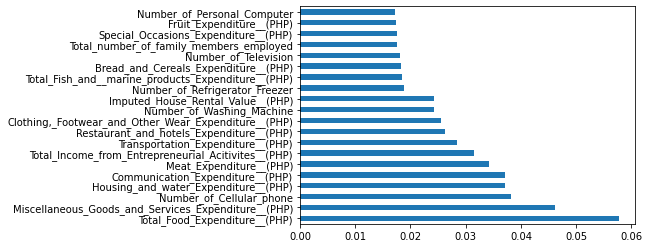

In [ ]:
# getting the top 20 attributes (can be the basis of getting which independent variables to use in modeling)

indep = df.iloc[:,1:] # independent columns
dep = df['Social_Classes'] # target column

model = ExtraTreesClassifier()
model.fit(indep,dep)
print(model.feature_importances_) # use inbuilt class feature_importances of tree based classifiers

# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index = indep.columns)
feat_importances.nlargest(20).plot(kind = 'barh')
plt.show()

In [ ]:
df.corr()

,Social_Classes,Region,Total_Food_Expenditure__(PHP),Main_Source_of_Income,Agricultural_Household_indicator_,Bread_and_Cereals_Expenditure__(PHP),Total_Rice_Expenditure__(PHP),Meat_Expenditure__(PHP),Total_Fish_and__marine_products_Expenditure__(PHP),Fruit_Expenditure__(PHP),Vegetables_Expenditure__(PHP),Restaurant_and_hotels_Expenditure__(PHP),Alcoholic_Beverages_Expenditure__(PHP),Tobacco_Expenditure__(PHP),"Clothing,_Footwear_and_Other_Wear_Expenditure__(PHP)",Housing_and_water_Expenditure__(PHP),Imputed_House_Rental_Value__(PHP),Medical_Care_Expenditure__(PHP),Transportation_Expenditure__(PHP),Communication_Expenditure__(PHP),Education_Expenditure__(PHP),Miscellaneous_Goods_and_Services_Expenditure__(PHP),Special_Occasions_Expenditure__(PHP),Crop_Farming_and_Gardening_expenses__(PHP),Total_Income_from_Entrepreneurial_Acitivites__(PHP),Household_Head_Sex,Household_Head_Age,Household_Head_Age_Group,Household_Head_Marital_Status,Household_Head_Highest_Grade_Completed,Household_Head_College_Program,Household_Head_Job_or_Business_Indicator,Household_Head_Occupation_Major_Group,Household_Head_Class_of_Worker,Type_of_Household,Total_Number_of_Family_members,Members_with_age_less_than_5_year_old,Members_with_age_5___17_years_old,Total_number_of_family_members_employed,Type_of_Building_House,Type_of_Roof,Type_of_Walls,House_Floor_Area,House_Age,Number_of_bedrooms,Tenure_Status,Toilet_Facilities,Electricity,Main_Source_of_Water_Supply,Number_of_Television,Number_of_CD_VCD_DVD,Number_of_Component_Stereo_set,Number_of_Refrigerator_Freezer,Number_of_Washing_Machine,Number_of_Airconditioner,"Number_of_Car,_Jeep,_Van",Number_of_Landline_wireless_telephones,Number_of_Cellular_phone,Number_of_Personal_Computer,Number_of_Stove_with_Oven_Gas_Range,Number_of_Motorized_Banca,Number_of_Motorcycle_Tricycle
Social_Classes,1.000000,0.047484,-0.109705,-0.098944,0.071758,-0.150994,-0.157548,-0.106209,-0.091386,0.005344,-0.081315,-0.015042,-0.056533,-0.092069,0.061971,0.059311,0.076724,0.038219,0.061121,0.104036,0.058010,0.059760,0.021519,0.024777,0.072877,-0.018762,0.032729,0.017314,0.048322,0.011170,-0.001345,-0.004517,0.059933,0.023880,0.087122,-0.143344,-0.010755,-0.072821,-0.104014,0.056564,-0.162667,-0.153953,-0.012171,-0.059399,-0.045078,-0.064885,-0.191531,-0.205131,0.045284,-0.119834,-0.104119,-0.016739,-0.114157,-0.127032,0.136313,0.165464,0.075041,-0.167704,0.067404,0.005766,-0.009176,-0.103248
Region,0.047484,1.000000,-0.022605,0.098451,0.056100,0.019449,-0.016984,-0.067313,0.022253,-0.026829,-0.094580,-0.017859,0.030114,-0.006640,-0.005570,0.000206,-0.006798,0.004895,0.006444,-0.011424,-0.001139,-0.004512,0.028602,-0.103672,-0.038917,-0.021218,0.015902,0.017479,0.010139,-0.014233,-0.006450,0.006443,-0.059969,-0.004948,0.000090,-0.041490,-0.001375,-0.036260,0.032582,0.032149,-0.022947,-0.025762,-0.128570,-0.051034,-0.016511,-0.076798,0.094921,0.020642,0.012885,-0.030759,0.020495,0.056375,0.020127,-0.075496,0.025283,-0.013451,0.008705,-0.025950,-0.015713,0.023262,-0.028319,0.006063
Total_Food_Expenditure__(PHP),-0.109705,-0.022605,1.000000,0.157081,0.038166,0.600144,0.435712,0.771391,0.605508,0.525979,0.555927,0.732309,0.217755,0.163946,0.543146,0.521983,0.389442,0.186670,0.577461,0.633657,0.374566,0.594343,0.296513,0.020653,0.243900,0.028767,-0.006827,0.013381,-0.103179,-0.166685,-0.155965,-0.032615,-0.019086,-0.100550,-0.227480,0.417946,0.115715,0.145224,0.342126,-0.084812,0.204224,0.198819,0.264522,0.111993,0.323198,0.097358,0.238789,0.211205,-0.169320,0.463792,0.368560,0.286156,0.435863,0.468074,0.396403,0.367443,0.288154,0.597017,0.504187,0.303326,0.009892,0.243775
Main_Source_of_Income,-0.098944,0.098451,0.157081,1.000000,-0.069430,0.056413,0.034870,0.148085,0.006118,0.009459,0.016177,0.178575,0.067931,0.069143,0.081867,0.051711,0.025221,0.007365,0.131218,0.100635,0.008276,0.190209,0.028284,-0.264067,-0.324132,0.004358,-0.065542,-0.056209,-0.014503,-0.057561,-0.036620,-0.007040,-0.191593,-0.127677,-0.058897,0.078216,0.046464,-0.02991

In [ ]:
# the pairplot() method visualizes given data in a form of a scatter plot, distribution chart or bar chart to find the relationship between
# the data where the variables can be continuous or categorical.
# plotting multiple pairwise bivariate distributions in the dataset using the pairplot() function. you will see that the said function helped
# produced scatter plots and bar charts for visualizing the given data.


# sns.pairplot(df[['Total_Household_Income_(PHP)', 'Total_Food_Expenditure__(PHP)', 'Bread_and_Cereals_Expenditure__(PHP)', 'Total_Rice_Expenditure__(PHP)', 'Meat_Expenditure__(PHP)',
#   'Total_Fish_and__marine_products_Expenditure__(PHP)', 'Fruit_Expenditure__(PHP)', 'Vegetables_Expenditure__(PHP)', 'Restaurant_and_hotels_Expenditure__(PHP)', 'Alcoholic_Beverages_Expenditure__(PHP)',
#   'Tobacco_Expenditure__(PHP)', 'Clothing,_Footwear_and_Other_Wear_Expenditure__(PHP)', 'Housing_and_water_Expenditure__(PHP)', 'Imputed_House_Rental_Value__(PHP)', 'Medical_Care_Expenditure__(PHP)',
#   'Transportation_Expenditure__(PHP)', 'Communication_Expenditure__(PHP)', 'Education_Expenditure__(PHP)', 'Miscellaneous_Goods_and_Services_Expenditure__(PHP)', 'Special_Occasions_Expenditure__(PHP)',
#   'Crop_Farming_and_Gardening_expenses__(PHP)', 'Total_Income_from_Entrepreneurial_Acitivites__(PHP)']])

In [ ]:
df = shuffle(df)
df

,Social_Classes,Region,Total_Food_Expenditure__(PHP),Main_Source_of_Income,Agricultural_Household_indicator_,Bread_and_Cereals_Expenditure__(PHP),Total_Rice_Expenditure__(PHP),Meat_Expenditure__(PHP),Total_Fish_and__marine_products_Expenditure__(PHP),Fruit_Expenditure__(PHP),Vegetables_Expenditure__(PHP),Restaurant_and_hotels_Expenditure__(PHP),Alcoholic_Beverages_Expenditure__(PHP),Tobacco_Expenditure__(PHP),"Clothing,_Footwear_and_Other_Wear_Expenditure__(PHP)",Housing_and_water_Expenditure__(PHP),Imputed_House_Rental_Value__(PHP),Medical_Care_Expenditure__(PHP),Transportation_Expenditure__(PHP),Communication_Expenditure__(PHP),Education_Expenditure__(PHP),Miscellaneous_Goods_and_Services_Expenditure__(PHP),Special_Occasions_Expenditure__(PHP),Crop_Farming_and_Gardening_expenses__(PHP),Total_Income_from_Entrepreneurial_Acitivites__(PHP),Household_Head_Sex,Household_Head_Age,Household_Head_Age_Group,Household_Head_Marital_Status,Household_Head_Highest_Grade_Completed,Household_Head_College_Program,Household_Head_Job_or_Business_Indicator,Household_Head_Occupation_Major_Group,Household_Head_Class_of_Worker,Type_of_Household,Total_Number_of_Family_members,Members_with_age_less_than_5_year_old,Members_with_age_5___17_years_old,Total_number_of_family_members_employed,Type_of_Building_House,Type_of_Roof,Type_of_Walls,House_Floor_Area,House_Age,Number_of_bedrooms,Tenure_Status,Toilet_Facilities,Electricity,Main_Source_of_Water_Supply,Number_of_Television,Number_of_CD_VCD_DVD,Number_of_Component_Stereo_set,Number_of_Refrigerator_Freezer,Number_of_Washing_Machine,Number_of_Airconditioner,"Number_of_Car,_Jeep,_Van",Number_of_Landline_wireless_telephones,Number_of_Cellular_phone,Number_of_Personal_Computer,Number_of_Stove_with_Oven_Gas_Range,Number_of_Motorized_Banca,Number_of_Motorcycle_Tricycle
28188,0,3,79176,0,0,28977,24941,17200,11686,1120,3930,850,0,0,805,18648,9600,358,3234,2010,0,3510,2700,21980,129820,1,61,4,2,4,15,1,4,1,0,7,1,2,3,5,3,2,40,40,1,2,7,1,4,1,0,0,0,0,0,0,0,3,0,0,0,0
19426,5,13,159071,2,0,36824,26940,50200,21940,4079,4960,4700,750,0,24896,56262,27000,15005,33642,24720,11735,68640,35000,0,0,1,40,1,2,0,6,1,7,1,1,5,1,2,2,5,3,2,29,15,2,4,7,1,3,1,1,1,1,1,1,0,0,2,1,0,0,1
6515,0,4,88129,0,1,49890,47040,5883,7181,950,4104,11898,0,300,3180,15324,6600,540,2880,900,3275,7896,625,93298,114958,1,55,3,2,2,15,1,9,4,0,8,2,1,4,5,3,2,72,20,1,4,5,1,3,1,0,0,0,0,0,0,0,3,0,0,0,0
35193,3,8,49724,2,0,31914,0,1644,3048,1270,5510,1460,282,510,5078,7260,3000,242,4188,318,600,2058,0,10091,10091,1,42,2,2,3,15,1,2,3,1,9,1,4,2,5,0,0,17,1,1,2,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2850,1,6,110463,2,0,23690,18606,11541,14828,1124,3115,28850,6240,21720,2190,47220,24000,125,35394,4944,550,13140,3000,0,32246,1,52,3,2,3,15,1,3,3,1,5,0,1,3,5,3,2,65,17,2,4,7,1,3,1,1,0,1,1,0,0,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39633,0,9,195793,0,2,39153,29128,22028,15734,3135,5894,59200,3406,5973,1430,60708,36000,2362,11712,23262,4870,15900,8800,0,160200,1,49,2,2,1,15,1,6,3,1,6,1,1,1,5,3,2,40,20,3,4,7,1,3,1,0,0,1,1,0,0,0,5,0,1,0,1
24517,3,16,49963,2,0,18506,10679,5437,4873,345,5595,6470,0,0,2787,6732,3000,854,1560,660,100,552,0,9216,9216,1,36,1,1,2,15,1,3,3,1,1,0,0,1,5,0,0,10,7,1,4,6,1,8,0,0,0,0,0,0,0,0,1,0,0,0,0
12700,0,15,107165,0,0,51001,48009,8084,17398,230,4063,3500,720,17330,3666,24180,12600,3050,14544,3252,800,7440,10000,0,146208,1,52,3,2,1,15,1,9,4,0,9,1,2,3,5,3,2,40,25,3,4,7,1,4,1,1,1,1,0,0,0,0,4,0,0,0,1
26805,3,7,48019,1,0,18237,14752,387,13929,3355,2923,3900,1170,1170,2785,12900,6000,1021,1800,900,0,1716,0,10687,36787,0,60,3,4,5,15,1,9,4,0,4,0,1,1,5,2,1,40,46,0,4,0,1,0,1,0,0,0,0,0,0,0,2,0,0,0,0


In [ ]:
# storing attributes for X
# storing attribute  for y 

X = df.iloc[:,1:]
y = df['Social_Classes']

In [ ]:
X.shape

(41447, 61)

In [ ]:
y.shape

(41447,)

In [ ]:
X.head()

,Region,Total_Food_Expenditure__(PHP),Main_Source_of_Income,Agricultural_Household_indicator_,Bread_and_Cereals_Expenditure__(PHP),Total_Rice_Expenditure__(PHP),Meat_Expenditure__(PHP),Total_Fish_and__marine_products_Expenditure__(PHP),Fruit_Expenditure__(PHP),Vegetables_Expenditure__(PHP),Restaurant_and_hotels_Expenditure__(PHP),Alcoholic_Beverages_Expenditure__(PHP),Tobacco_Expenditure__(PHP),"Clothing,_Footwear_and_Other_Wear_Expenditure__(PHP)",Housing_and_water_Expenditure__(PHP),Imputed_House_Rental_Value__(PHP),Medical_Care_Expenditure__(PHP),Transportation_Expenditure__(PHP),Communication_Expenditure__(PHP),Education_Expenditure__(PHP),Miscellaneous_Goods_and_Services_Expenditure__(PHP),Special_Occasions_Expenditure__(PHP),Crop_Farming_and_Gardening_expenses__(PHP),Total_Income_from_Entrepreneurial_Acitivites__(PHP),Household_Head_Sex,Household_Head_Age,Household_Head_Age_Group,Household_Head_Marital_Status,Household_Head_Highest_Grade_Completed,Household_Head_College_Program,Household_Head_Job_or_Business_Indicator,Household_Head_Occupation_Major_Group,Household_Head_Class_of_Worker,Type_of_Household,Total_Number_of_Family_members,Members_with_age_less_than_5_year_old,Members_with_age_5___17_years_old,Total_number_of_family_members_employed,Type_of_Building_House,Type_of_Roof,Type_of_Walls,House_Floor_Area,House_Age,Number_of_bedrooms,Tenure_Status,Toilet_Facilities,Electricity,Main_Source_of_Water_Supply,Number_of_Television,Number_of_CD_VCD_DVD,Number_of_Component_Stereo_set,Number_of_Refrigerator_Freezer,Number_of_Washing_Machine,Number_of_Airconditioner,"Number_of_Car,_Jeep,_Van",Number_of_Landline_wireless_telephones,Number_of_Cellular_phone,Number_of_Personal_Computer,Number_of_Stove_with_Oven_Gas_Range,Number_of_Motorized_Banca,Number_of_Motorcycle_Tricycle
28188,3,79176,0,0,28977,24941,17200,11686,1120,3930,850,0,0,805,18648,9600,358,3234,2010,0,3510,2700,21980,129820,1,61,4,2,4,15,1,4,1,0,7,1,2,3,5,3,2,40,40,1,2,7,1,4,1,0,0,0,0,0,0,0,3,0,0,0,0
19426,13,159071,2,0,36824,26940,50200,21940,4079,4960,4700,750,0,24896,56262,27000,15005,33642,24720,11735,68640,35000,0,0,1,40,1,2,0,6,1,7,1,1,5,1,2,2,5,3,2,29,15,2,4,7,1,3,1,1,1,1,1,1,0,0,2,1,0,0,1
6515,4,88129,0,1,49890,47040,5883,7181,950,4104,11898,0,300,3180,15324,6600,540,2880,900,3275,7896,625,93298,114958,1,55,3,2,2,15,1,9,4,0,8,2,1,4,5,3,2,72,20,1,4,5,1,3,1,0,0,0,0,0,0,0,3,0,0,0,0
35193,8,49724,2,0,31914,0,1644,3048,1270,5510,1460,282,510,5078,7260,3000,242,4188,318,600,2058,0,10091,10091,1,42,2,2,3,15,1,2,3,1,9,1,4,2,5,0,0,17,1,1,2,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2850,6,110463,2,0,23690,18606,11541,14828,1124,3115,28850,6240,21720,2190,47220,24000,125,35394,4944,550,13140,3000,0,32246,1,52,3,2,3,15,1,3,3,1,5,0,1,3,5,3,2,65,17,2,4,7,1,3,1,1,0,1,1,0,0,0,3,0,0,0,0


In [ ]:
y.head()

28188    0
19426    5
6515     0
35193    3
2850     1
Name: Social_Classes, dtype: int64

In [ ]:
# splitting the dataset in the train and test data, 30% for the test size

print("Splitting the train and test data.....")
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

Splitting the train and test data.....


In [ ]:
# building the decision tree model and fitting in the train data
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# make a prediction; get the predicted value using y_pred and get the first 20 predicted value
y_pred_dtree = dtree.predict(X_test)
print("Actual Value (First 20): ", y_test[:20])
print("Predicted Value (First 20): ", y_pred_dtree[:20])

# getting the accuracy score
acc_dtree = round(dtree.score(X_train, y_train) * 100, 2)

Actual Value (First 20):  38292    1
6470     3
4831     3
23259    3
21037    3
27021    1
15534    3
33109    0
19914    0
39752    2
9182     0
16491    1
41130    1
40358    3
16157    2
7488     3
39874    1
25558    3
28125    1
29826    3
Name: Social_Classes, dtype: int64
Predicted Value (First 20):  [1 0 3 3 3 1 3 0 0 1 0 1 0 3 2 3 2 0 1 3]


In [ ]:
# building the support vector machine model and fitting in the train data
from sklearn import svm
linear_svc = svm.LinearSVC(dual=False)
linear_svc.fit(X_train, y_train)

# make a prediction; get the predicted value using y_pred and get the first 20 predicted value
y_pred_svc = linear_svc.predict(X_test)
print("Actual Value (First 20): ", y_test[:20])
print("Predicted Value (First 20): ", y_pred_svc[:20])

# getting the accuracy score
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

Actual Value (First 20):  38292    1
6470     3
4831     3
23259    3
21037    3
27021    1
15534    3
33109    0
19914    0
39752    2
9182     0
16491    1
41130    1
40358    3
16157    2
7488     3
39874    1
25558    3
28125    1
29826    3
Name: Social_Classes, dtype: int64
Predicted Value (First 20):  [1 0 3 3 0 0 3 0 0 1 0 1 0 3 1 3 1 3 1 3]


In [ ]:
# building the knn model and fitting in the train data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# make a prediction; get the predicted value using y_pred and get the first 20 predicted value
y_pred_knn = knn.predict(X_test)
print("Actual Value (First 20): ", y_test[:20])
print("Predicted Value (First 20): ", y_pred_knn[:20])

# getting the accuracy score
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

Actual Value (First 20):  38292    1
6470     3
4831     3
23259    3
21037    3
27021    1
15534    3
33109    0
19914    0
39752    2
9182     0
16491    1
41130    1
40358    3
16157    2
7488     3
39874    1
25558    3
28125    1
29826    3
Name: Social_Classes, dtype: int64
Predicted Value (First 20):  [0 0 3 3 3 0 3 0 3 2 0 1 1 3 1 3 1 0 1 3]


In [ ]:
# building the random forest model and fitting in the train data
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

# make a prediction; get the predicted value using y_pred and get the first 20 predicted value
y_pred_rndmfor = random_forest.predict(X_test)
print("Actual Value (First 20): ", y_test[:20])
print("Predicted Value (First 20): ", y_pred_rndmfor[:20])

# getting the accuracy score
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

Actual Value (First 20):  38292    1
6470     3
4831     3
23259    3
21037    3
27021    1
15534    3
33109    0
19914    0
39752    2
9182     0
16491    1
41130    1
40358    3
16157    2
7488     3
39874    1
25558    3
28125    1
29826    3
Name: Social_Classes, dtype: int64
Predicted Value (First 20):  [1 0 3 3 3 0 3 0 0 1 0 1 1 3 1 0 1 0 1 3]


In [ ]:
# building the naive bayes model and fitting in the train data
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

# make a prediction; get the predicted value using y_pred and get the first 20 predicted value
y_pred_nb = gaussian.predict(X_test)
print("Actual Value (First 20): ", y_test[:20])
print("Predicted Value (First 20): ", y_pred_nb[:20])

# getting the accuracy score
acc_nb = round(gaussian.score(X_train, y_train) * 100, 2)

Actual Value (First 20):  38292    1
6470     3
4831     3
23259    3
21037    3
27021    1
15534    3
33109    0
19914    0
39752    2
9182     0
16491    1
41130    1
40358    3
16157    2
7488     3
39874    1
25558    3
28125    1
29826    3
Name: Social_Classes, dtype: int64
Predicted Value (First 20):  [1 3 3 3 3 0 3 0 0 1 0 1 1 3 1 3 1 3 1 3]


In [ ]:
# accuracy results

results = pd.DataFrame({
    'Model': ['Decision Tree', 'Support Vector Machine', 'KNN', 'Random Forest', 'Naive Bayes'],
    'Score': [acc_dtree, acc_linear_svc, acc_knn, acc_random_forest, acc_nb]
})

result_data = results.sort_values(by='Score', ascending=False)
result_data = result_data.set_index('Score')
result_data.head(6)

,Model
Score,
100.00,Decision Tree
100.00,Random Forest
83.39,KNN
71.92,Naive Bayes
67.80,Support Vector Machine


In [ ]:
# coefficient of determination

from sklearn.metrics import r2_score

r2_dtree = r2_score(y_test, y_pred_dtree)
r2_svc = r2_score(y_test, y_pred_svc)
r2_knn = r2_score(y_test, y_pred_knn)
r2_rndmfor = r2_score(y_test, y_pred_rndmfor)
r2_nb = r2_score(y_test, y_pred_nb)

In [ ]:
# r2 result

results = pd.DataFrame({
    'Model': ['Decision Tree', 'Support Vector Machine', 'KNN', 'Random Forest', 'Naive Bayes'],
    'r2 Score': [r2_dtree, r2_svc, r2_knn, r2_rndmfor, r2_nb]
})

result_data = results.sort_values(by='r2 Score', ascending=False)
result_data = result_data.set_index('r2 Score')
result_data.head(6)

,Model
r2 Score,
0.402679,Random Forest
0.267813,KNN
0.249603,Naive Bayes
0.140011,Support Vector Machine
0.136990,Decision Tree


In [ ]:
# accuracy measures for Decision Tree

# accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_dtree)
print('Accuracy: %f' % accuracy)

# precision: tp / (tp + fp)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_dtree, average = 'weighted', labels = np.unique(y_pred_dtree))
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred_dtree, average = 'weighted', labels = np.unique(y_pred_dtree))
print('Recall: %f' % recall)

# f1: 2*R*P / R+P or 2 tp / (2 tp + fp + fn)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_dtree, average = 'weighted', labels = np.unique(y_pred_dtree))
print('F1 score: %f' % f1)

Accuracy: 0.680016
Precision: 0.680943
Recall: 0.680016
F1 score: 0.680457


In [ ]:
# accuracy measures for Support Vector

# accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_svc)
print('Accuracy: %f' % accuracy)

# precision: tp / (tp + fp)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_svc, average = 'weighted', labels = np.unique(y_pred_svc))
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred_svc, average = 'weighted', labels = np.unique(y_pred_svc))
print('Recall: %f' % recall)

# f1: 2*R*P / R+P or 2 tp / (2 tp + fp + fn)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_svc, average = 'weighted', labels = np.unique(y_pred_svc))
print('F1 score: %f' % f1)

Accuracy: 0.679453
Precision: 0.663767
Recall: 0.679453
F1 score: 0.661248


In [ ]:
# accuracy measures K-Nearest Neighbor

# accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_knn)
print('Accuracy: %f' % accuracy)

# precision: tp / (tp + fp)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_knn, average = 'weighted', labels = np.unique(y_pred_knn))
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred_knn, average = 'weighted', labels = np.unique(y_pred_knn))
print('Recall: %f' % recall)

# f1: 2*R*P / R+P or 2 tp / (2 tp + fp + fn)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_knn, average = 'weighted', labels = np.unique(y_pred_knn))
print('F1 score: %f' % f1)

Accuracy: 0.719501
Precision: 0.714269
Recall: 0.719501
F1 score: 0.715168


In [ ]:
# accuracy measures Random Forest

# accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_rndmfor)
print('Accuracy: %f' % accuracy)

# precision: tp / (tp + fp)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_rndmfor, average = 'weighted', labels = np.unique(y_pred_rndmfor))
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred_rndmfor, average = 'weighted', labels = np.unique(y_pred_rndmfor))
print('Recall: %f' % recall)

# f1: 2*R*P / R+P or 2 tp / (2 tp + fp + fn)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_rndmfor, average = 'weighted', labels = np.unique(y_pred_rndmfor))
print('F1 score: %f' % f1)

Accuracy: 0.771854
Precision: 0.770759
Recall: 0.772724
F1 score: 0.769939


In [ ]:
# accuracy measures Naive Bayes

# accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_nb)
print('Accuracy: %f' % accuracy)

# precision: tp / (tp + fp)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_nb, average = 'weighted', labels = np.unique(y_pred_nb))
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred_nb, average = 'weighted', labels = np.unique(y_pred_nb))
print('Recall: %f' % recall)

# f1: 2*R*P / R+P or 2 tp / (2 tp + fp + fn)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_nb, average = 'weighted', labels = np.unique(y_pred_nb))
print('F1 score: %f' % f1)

Accuracy: 0.719501
Precision: 0.715516
Recall: 0.719501
F1 score: 0.714646


negative: negative observation

positive: positive observation

- **tn: observation is negative and predicted to be negative**

- **fp: observation is negative, but predicted positive**

- **fn: observation is positive, but predicted negative**

- **tp: observation is positive and predicted to be positive**

tn fp
fn tp

Confusion Matrix : 
 [[2704  627   33  840    0    7]
 [ 604 1472  287   51    2   25]
 [  33  267  391    2    1  100]
 [ 888   51    0 3735    0    1]
 [   0    0    0    0    5    9]
 [   7   32  102    0   10  149]]


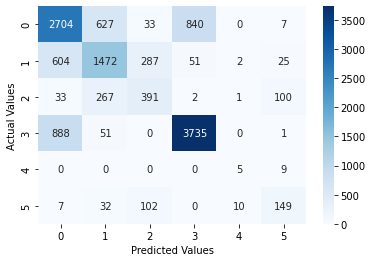

In [ ]:
# confusion matrix for Decision Tree

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred_dtree)
print("Confusion Matrix : \n", cm1)

confusion_matrix = pd.crosstab(y_test, y_pred_dtree, rownames = ['Actual Values'], colnames = ['Predicted Values'])
sns.heatmap(confusion_matrix, annot = True, fmt = 'd', cmap = 'Blues')

Confusion Matrix : 
 [[2705  259    6 1241    0    0]
 [1005 1338   40   52    0    6]
 [  62  592  122    1    0   17]
 [ 450    7    1 4217    0    0]
 [   0    0    2    0    1   11]
 [   5  145   80    0    4   66]]


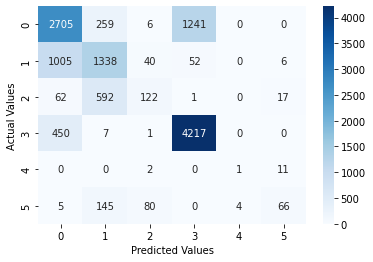

In [ ]:
# confusion matrix for Support Vector

from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix : \n", cm2)

confusion_matrix = pd.crosstab(y_test, y_pred_svc, rownames = ['Actual Values'], colnames = ['Predicted Values'])
sns.heatmap(confusion_matrix, annot = True, fmt = 'd', cmap = 'Blues')

Confusion Matrix : 
 [[2921  352    3  935    0    0]
 [ 776 1466  167   28    0    4]
 [  37  370  341    0    0   46]
 [ 609    6    1 4059    0    0]
 [   0    0    1    0    6    7]
 [   3   33  109    0    1  154]]


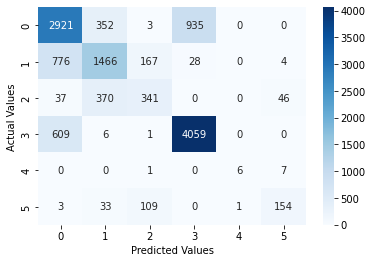

In [ ]:
# confusion matrix for K-Nearest Neighbor

from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix : \n", cm3)

confusion_matrix = pd.crosstab(y_test, y_pred_knn, rownames = ['Actual Values'], colnames = ['Predicted Values'])
sns.heatmap(confusion_matrix, annot = True, fmt = 'd', cmap = 'Blues')

Confusion Matrix : 
 [[3245  342    1  623    0    0]
 [ 572 1739  112   18    0    0]
 [  16  334  420    0    0   24]
 [ 598    1    0 4076    0    0]
 [   0    0    1    0    0   13]
 [   3   31  148    0    0  118]]


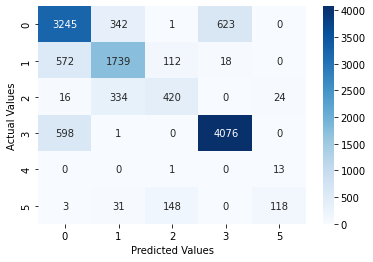

In [ ]:
# confusion matrix for Random Forest

from sklearn.metrics import confusion_matrix

cm4 = confusion_matrix(y_test, y_pred_rndmfor)
print("Confusion Matrix : \n", cm4)

confusion_matrix = pd.crosstab(y_test, y_pred_rndmfor, rownames = ['Actual Values'], colnames = ['Predicted Values'])
sns.heatmap(confusion_matrix, annot = True, fmt = 'd', cmap = 'Blues')

Confusion Matrix : 
 [[2708  364   16 1117    2    4]
 [ 698 1424  267   26    3   23]
 [  15  260  435    0    3   81]
 [ 432   22    7 4212    0    2]
 [   0    0    0    0   11    3]
 [   2   17  100    0   24  157]]


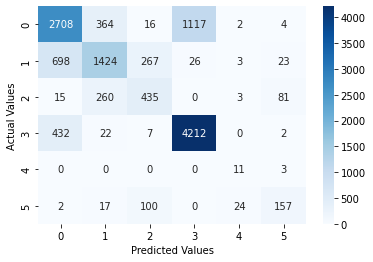

In [ ]:
# confusion matrix for Naive Bayes

from sklearn.metrics import confusion_matrix

cm5 = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix : \n", cm5)

confusion_matrix = pd.crosstab(y_test,y_pred_nb, rownames = ['Actual Values'], colnames = ['Predicted Values'])
sns.heatmap(confusion_matrix, annot = True, fmt = 'd', cmap = 'Blues')

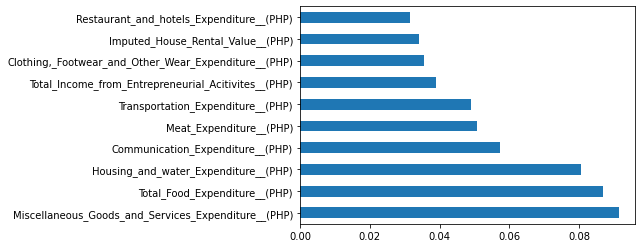

In [ ]:
pd.set_option('display.max_rows', 1000)

importances = random_forest.feature_importances_
forest_importances = pd.Series(importances, index = X_train.transpose().index)
forest_importances.nlargest(10).plot(kind = 'barh')
plt.show()

In [ ]:
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr = std, ax = ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.show()

In [ ]:
sample_pred = random_forest.predict(X_test)
print("Actual Value:", y_test[99:100])
print("Predicted Value:", y_pred_rndmfor[99:100])

Actual Value: 614    0
Name: Social_Classes, dtype: int64
Predicted Value: [0]
